# Data Inspection - NYC Market dataset

Before performing any analysis on the NYC market dataset, I'll explore the data to detect anomalies or integrity issues that may exist.

In [1]:
import pandas as pd
import missingno as msno

df = pd.read_csv("analyze_me.csv")
df.shape

(5983, 18)

We can see that this dataset has 18 columns and 5,983 rows. Let's get a small sample of the first 5 rows:

In [2]:
df.head()

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
0,1457973,327168,162381,van,Melt Shop,American,Lemonade,1.0,Beverages,00:19:58.582052,40.744607,-73.990742,40.752073,-73.985370,2014-10-26 13:51:59.898924,NaN,NaN,2014-10-26 14:52:06.313088
1,1377056,64452,104533,bicycle,Prince Street Pizza,Pizza,Neapolitan Rice Balls,3.0,Munchables,00:25:09.107093,40.723080,-73.994615,40.719722,-73.991858,2014-10-16 21:58:58.65491,2014-10-16 22:26:02.120931,2014-10-16 22:48:23.091253,2014-10-16 22:59:22.948873
2,1476547,83095,132725,bicycle,Bareburger,Burger,Bare Sodas,1.0,Drinks,00:06:44.541717,40.728478,-73.998392,40.728606,-73.995143,2014-10-28 21:39:52.654394,2014-10-28 21:37:18.793405,2014-10-28 21:59:09.98481,2014-10-28 22:04:40.634962
3,1485494,271149,157175,bicycle,Juice Press,Juice Bar,OMG! My Favorite Juice!,1.0,Cold Pressed Juices,NaN,40.738868,-74.002747,40.751257,-74.005634,2014-10-30 10:54:11.531894,2014-10-30 11:04:17.759577,2014-10-30 11:16:37.895816,2014-10-30 11:32:38.090061
4,1327707,122609,118095,bicycle,Blue Ribbon Sushi,Japanese,Spicy Tuna & Tempura Flakes,2.0,Maki (Special Rolls),00:03:45.035418,40.726110,-74.002492,40.709323,-74.015867,2014-10-10 00:07:18.450505,2014-10-10 00:14:42.702223,2014-10-10 00:25:19.400294,2014-10-10 00:48:27.150595


First, let's see how many missing values we have in the dataset through a visualization method:

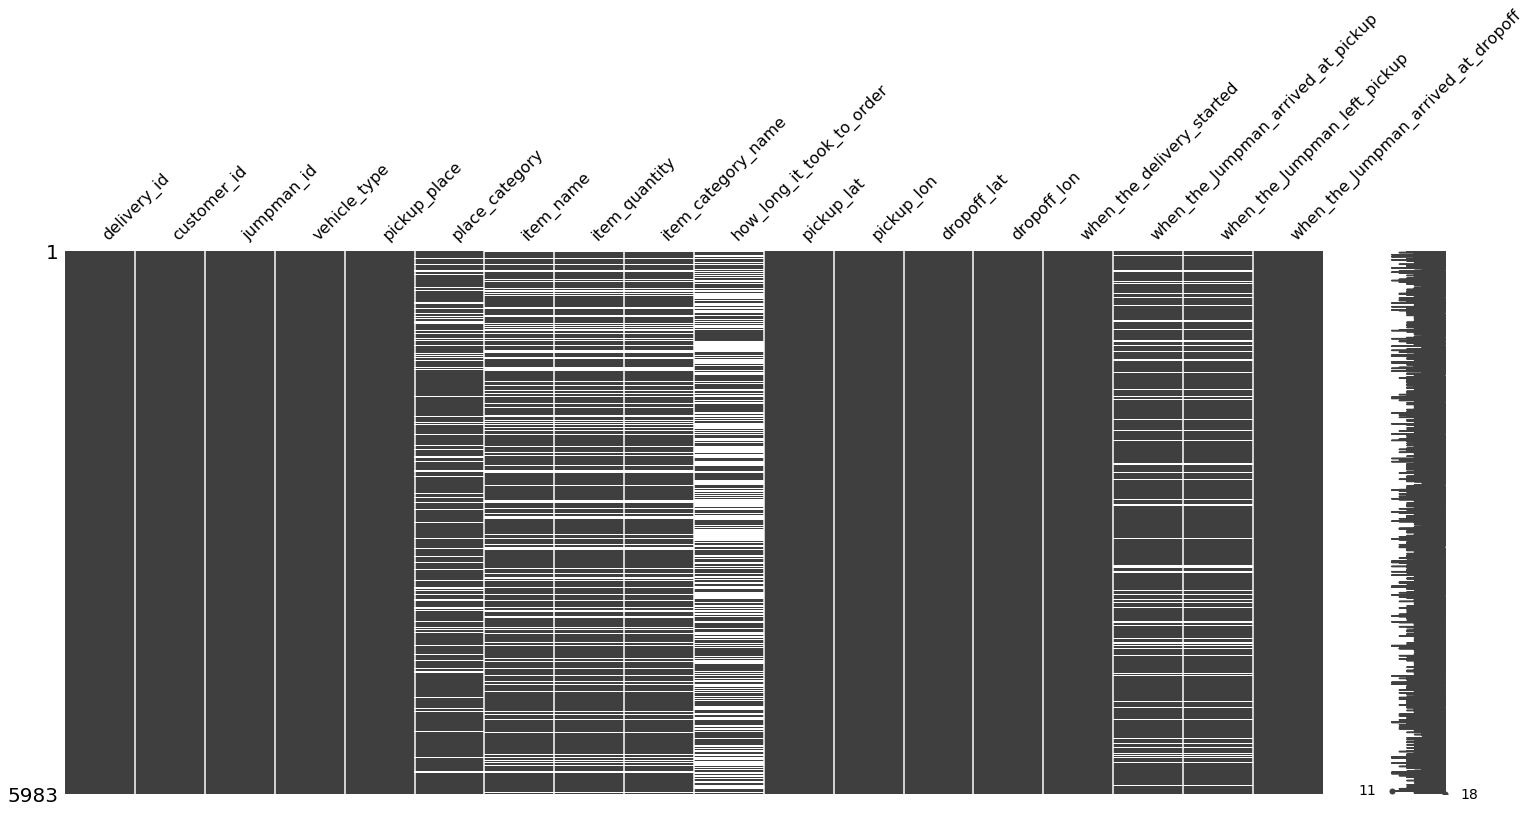

In [3]:
msno.matrix(df)

From the image above, we can see that we have missing values in 7 columns: *place_category*, *item_name*, *item_quantity*, *item_category_name*, *how_long_it_took_to_order*, *when_the_jumpman_arrived_at_pickup* and *when_the_jumpman_left_pickup*.

Now I'm going to analyze each column or group of similar columns separately to detect any problems in the data.

## Column 1

This column has no missing values. Let's now check if this is a unique id (primary key) or not.

In [4]:
print("# of rows: " + str(df.shape[0]))
print("# of unique id's: " + str(len(df.delivery_id.unique())))
print(df.delivery_id.dtype)

# of rows: 5983
# of unique id's: 5214
int64


We have 5,983 rows in the dataset, but only 5,214 unique delivery_id's. Clearly, we have duplicate id's. Let's check a sample of duplicate rows:

In [5]:
s1 = set(df.index)
s2 = set(df.delivery_id.drop_duplicates().index)
duplicates = s1-s2
duplicate_ids = df.iloc[list(duplicates)].delivery_id
df.query("delivery_id in @duplicate_ids").sort_values("delivery_id").head(10)

,delivery_id,customer_id,jumpman_id,vehicle_type,pickup_place,place_category,item_name,item_quantity,item_category_name,how_long_it_took_to_order,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon,when_the_delivery_started,when_the_Jumpman_arrived_at_pickup,when_the_Jumpman_left_pickup,when_the_Jumpman_arrived_at_dropoff
1008,1272701,81085,112646,bicycle,Mighty Quinn's BBQ,BBQ,Brisket,1.0,Meats,NaN,40.727519,-73.988671,40.723962,-73.993393,2014-10-01 12:12:24.393054,2014-10-01 12:17:22.929789,2014-10-01 12:27:42.369732,2014-10-01 12:34:27.142996
5080,1272701,81085,112646,bicycle,Mighty Quinn's BBQ,BBQ,Housemade Iced Tea,1.0,Beverages,NaN,40.727519,-73.988671,40.723962,-73.993393,2014-10-01 12:12:24.393054,2014-10-01 12:17:22.929789,2014-10-01 12:27:42.369732,2014-10-01 12:34:27.142996
2299,1274248,208020,60149,car,Murray's Falafel,Middle Eastern,Moroccan Cigars (5 pc),1.0,Appetizers,00:07:08.767432,40.732166,-73.981904,40.747019,-73.990922,2014-10-01 17:25:48.54633,2014-10-01 17:40:32.886964,2014-10-01 17:53:54.166799,2014-10-01 18:09:37.353403
2272,1274248,208020,60149,car,Murray's Falafel,Middle Eastern,Blue Lamoon Citrus blossom lemonade w/ Splenda,1.0,Beverages,00:07:08.767432,40.732166,-73.981904,40.747019,-73.990922,2014-10-01 17:25:48.54633,2014-10-01 17:40:32.886964,2014-10-01 17:53:54.166799,2014-10-01 18:09:37.353403
2986,1274248,208020,60149,car,Murray's Falafel,Middle Eastern,Watermelon,1.0,Desserts,00:07:08.767432,40.732166,-73.981904,40.747019,-73.990922,2014-10-01 17:25:48.54633,2014-10-01 17:40:32.886964,2014-10-01 17:53:54.166799,2014-10-01 18:09:37.353403
5386,1274328,255435,23359,bicycle,Lure Fishbar,Seafood,King Salmon,3.0,Sushi & Sashimi,00:11:23.081868,40.724635,-73.998402,40.743568,-73.972405,2014-10-01 17:47:16.707187,2014-10-01 17:44:49.255589,2014-10-01 18:21:08.892224,2014-10-01 18:41:16.203243
1588,1274328,255435,23359,bicycle,Lure Fishbar,Seafood,Big Eye Tuna,6.0,Sushi & Sashimi,00:11:23.081868,40.724635,-73.998402,40.743568,-73.972405,2014-10-01 17:47:16.707187,2014-10-01 17:44:49.255589,2014-10-01 18:21:08.892224,2014-10-01 18:41:16.203243
931,1274372,82041,133293,bicycle,Parm,Italian,Meatball Parm,1.0,Sandwiches,00:02:31.470754,40.723020,-73.995854,40.720479,-74.001549,2014-10-01 17:57:34.871703,2014-10-01 17:57:34.041223,2014-10-01 18:09:53.957556,2014-10-01 18:20:05.578047
4578,1274372,82041,133293,bicycle,Parm,Italian,Chicken Parm,1.0,Sandwiches,00:02:31.470754,40.723020,-73.995854,40.720479,-74.001549,2014-10-01 17:57:34.871703,2014-10-01 17:57:34.041223,2014-10-01 18:09:53.957556,2014-10-01 18:20:05.578047
2720,1274483,143721,119839,bicycle,Hummus Place,Middle Eastern,Hummus Mushrooms,1.0,Main,00:04:17.673533,40.732351,-74.003505,40.745171,-73.995214,2014-10-01 18:22:10.972903,2014-10-01 18:24:23.279272,2014-10-01 18:35:41.880544,2014-10-01 18:46:41.733986


From the sample above, we can see that each delivery_id corresponds to the whole order, so we may have duplicate delivery_id if the customer ordered different items at the same time. I could also check if the values related to the delivery remain the same for the same delivery_id (customer_id, jumpman_id, vehicle_type etc), but I'll just assume that there is no consistency issues of this kind.

## Columns 2 and 3

Those columns are also id's and have no missing values. I'll just check if the data type is consistent.

In [6]:
df.iloc[:,1:3].dtypes

customer_id    int64
jumpman_id     int64
dtype: object

Both columns are integers, so nothing is wrong here.

## Columns 4 and 5

Both columns are strings and have no missing values, so I'll check the consistency of the data type and if there is any misspelling of names.

In [7]:
df.iloc[:,3:5].dtypes

vehicle_type    object
pickup_place    object
dtype: object

In [8]:
df.vehicle_type.unique()

array(['van', 'bicycle', 'car', 'walker', 'truck', 'scooter',
       'motorcycle'], dtype=object)

In [9]:
set(df.pickup_place)

{' Il Mulino New York',
 '$10 Blue Ribbon Fried Chicken Sandwich',
 "'Essen",
 "'wichcraft",
 '11th Street Cafe',
 '12 Chairs',
 '143 Reade Street',
 '158',
 '16 East 11th street',
 '16 Handles',
 '16 Handles - Chelsea',
 '16 Handles - East Village',
 '16 Handles - Murray Hill',
 '16 Handles - UES 2nd Ave',
 '16 Handles - UWS Amsterdam',
 '16 Handles - UWS Broadway',
 '177 East 75th St',
 '220 East 23rd Street',
 '24 Central Park South',
 '25 Broadway',
 '29 w 57th st',
 '299 East 11th Nyc',
 '2nd Ave Deli',
 '3 Guys',
 '3 Guys Restaurant',
 '30 Wall Street',
 '300 East 85th, America',
 '300 North End Ave and Warren',
 '384 Broome St',
 '400 Fifth Avenue',
 '420 East 72nd St.',
 '456 Shanghai Cuisine',
 '460 park ave south',
 '5 Napkin Burger',
 '511 East 80th St',
 '514 w 24th St',
 '655 Park Avenue',
 '67 Burger',
 '7-Eleven',
 '86 Street Photo',
 'A Matter Of Health',
 'A Salt & Battery',
 'AG Kitchen',
 'ALJO Mfg. Co.',
 'AMC Loews Kips Bay 15',
 'Abracadabra NYC',
 'Absolute Bagel

If we take a look at the names of the places, we can find some similar names, like 'Momofuku Milk Bar' and 'Momofuku Milk Bar (archived)', "McDonald's" and "McDonald's DUPLICATE" or 'Dunkin Dounts' and "Dunkin' Donuts", for example. They could be the same place, or same brand but different locations. As it is not possible to know only by the name, I'll consider the coordinates of the place as its identifier. 

In [10]:
df[['pickup_place', 'place_category', 'pickup_lat', 'pickup_lon']].drop_duplicates().sort_values("pickup_place")

,pickup_place,place_category,pickup_lat,pickup_lon
5524,Il Mulino New York,Italian,40.764102,-73.970408
2809,Il Mulino New York,Italian,40.729951,-73.999027
166,$10 Blue Ribbon Fried Chicken Sandwich,NaN,40.724340,-73.990960
2439,'Essen,NaN,40.759766,-73.973921
5580,'wichcraft,American,40.739386,-73.990185
...,...,...,...,...
2464,i Trulli,Italian,40.742173,-73.983654
32,ilili Restaurant,Middle Eastern,40.744188,-73.987531
1017,indikitch,Indian,40.742006,-73.990281
39,sweetgreen,Salad,40.745079,-73.988822


Then, I'll assume that different coordinates correspond to different places. However, this may not be always true, as for example in the case of 'buybuy BABY' and 'buybuyBABY'. They have different names and slightly different coordinates, but if we plot in the map, those coordinates almost match, so it is probably the same place. For my analysis though, I'll still consider the coordinates as unique id's for places. 

## Columns 6, 7 and 9

Those columns are all strings and all have missing values. I'll first check the data types.

In [11]:
df.iloc[:, [5,6,8]].dtypes

place_category        object
item_name             object
item_category_name    object
dtype: object

Now I'll check the values for place_category and item_category_name.

In [12]:
df.place_category.unique()

array(['American', 'Pizza', 'Burger', 'Juice Bar', 'Japanese', 'Indian',
       'Sushi', 'Bakery', nan, 'Mexican', 'BBQ', 'Dessert', 'Vegan',
       'Fast Food', 'Korean', 'Drug Store', 'Italian', 'Grocery Store',
       'Breakfast', 'Coffee', 'Salad', 'Middle Eastern', 'Mediterranean',
       'Seafood', 'Russian', 'Southern', 'Vegetarian', 'Deli',
       'South American', 'French', 'Chinese', 'Asian', 'Donut',
       'Gluten-Free', 'Office Supplies Store', 'Convenience Store',
       'Shop', 'Food Truck', 'Clothing', 'German', 'Promo',
       'Electronics Store', 'Steak', 'Ice Cream', 'Thai', 'Spanish',
       'Caribbean', 'Vietnamese', 'Book Store', 'Specialty Store',
       'Eastern European', 'Kids & Baby', 'Department Store',
       'Beauty Supply', 'African', 'Restaurant', 'Art Store',
       'Pet Supplies Store'], dtype=object)

In [13]:
df.item_category_name.unique()

array(['Beverages', 'Munchables', 'Drinks', 'Cold Pressed Juices',
       'Maki (Special Rolls)', 'Vegetarian Specialties',
       'Classic Roll & Hand Roll', 'Cookies and Brownies', nan, 'Burgers',
       'Entrees', 'Meats', 'Market Lunch Specials (12-5pm)',
       'Specialty Cupcakes', 'Extras', 'Main Dishes', 'Sides & Snacks',
       'Brownies & Bars', 'Pasta', 'Flat-Top Dogs', 'Tortilla Chips',
       'Other Beverages', 'Market Sides', 'Breakfast',
       'Taiseyo (Atlantic Ocean)', 'Daily Soup and Sandwich Combo',
       'Pizza Wedge', 'Dips', 'Vegetables', 'Dinner Sushi Rolls',
       'Daily Soups', 'Appetizers', 'Fresh Pasta', 'Bareburgers',
       'Signatures', 'Fries', 'Wheat Flour', 'Basmati Degh Rice',
       'Veggie Combo', 'Juice Farmacy', 'Brunch', 'Kushi Yaki (Skewers)',
       'Rolls', 'Frozen Foods', 'Desserts and Chips',
       'Taiheiyo (Pacific Ocean)', 'Teas & Drinks',
       "Sarita's Recommendation", 'Cheese', 'Crif Dogs', 'Dinner Sides',
       'Make Your Own', 

Finally, I'm gonna check if, for the same delivery_id, we have both existing values and missing values. If that is the case, we can fill the missing values with the existing ones.

In [14]:
pd.options.display.max_rows = 100
df_aux = df.query("delivery_id in @duplicate_ids").sort_values("delivery_id")
nan_ids = df_aux[df_aux.place_category.isna()].delivery_id.unique()
df_aux.query("delivery_id in @nan_ids")[["delivery_id", "place_category"]]

,delivery_id,place_category
1160,1288130,NaN
292,1288130,NaN
5775,1288210,NaN
1849,1288210,NaN
3878,1294429,NaN
79,1294429,NaN
4167,1305748,NaN
5461,1305748,NaN
4884,1306055,NaN
3437,1306055,NaN


Every time we have a missing value for a place category, all the other values of place category are also missing for the same delivery_id, so I can't replace any missing values.

## Column 8

For this column, I'll only check the data type and ranges.

In [15]:
df.item_quantity.dtype

dtype('float64')

In [16]:
df.item_quantity.describe()

count    4753.000000
mean        1.248264
std         0.785904
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        16.000000
Name: item_quantity, dtype: float64

## Column 10

For this column, I'll do the same check as I did for place_category to see if I can replace any missing values.

In [17]:
nan_ids = df_aux[df_aux.how_long_it_took_to_order.isna()].delivery_id.unique()
all(df_aux.query("delivery_id in @nan_ids")[["delivery_id", "how_long_it_took_to_order"]].isna())

True

Again, if one value is missing for a delivery_id, all the other values will also be missing.

## Columns 11 to 14

All those columns are related to coordinates and we don't have any missing value. I'll just check if the ranges make sense.

In [18]:
df.iloc[:, 10:14].describe()

,pickup_lat,pickup_lon,dropoff_lat,dropoff_lon
count,5983.000000,5983.000000,5983.000000,5983.000000
mean,40.741425,-73.987101,40.744216,-73.985765
std,0.022833,0.014896,0.025251,0.018060
min,40.665611,-74.015837,40.649356,-74.017679
25%,40.724340,-73.996630,40.725307,-74.000297
50%,40.735677,-73.988682,40.740424,-73.989280
75%,40.758726,-73.980739,40.763885,-73.974696
max,40.818082,-73.920980,40.848324,-73.924124


## Columns 15 and 18

Both columns are timestamps and have no missing values. I'll check for the data types.

In [19]:
df.iloc[:, [14,17]].dtypes

when_the_delivery_started              object
when_the_Jumpman_arrived_at_dropoff    object
dtype: object

In this dataset, the timestamps are strings. I'll probably have to convert them to a datetime format to analyze them later.

## Columns 16 and 17

Finally, both columns are timestamps and have missing values. I'll check for the data types again, and also check if I can replace any missing value.

In [20]:
df.iloc[:, [15,16]].dtypes

when_the_Jumpman_arrived_at_pickup    object
when_the_Jumpman_left_pickup          object
dtype: object

In [21]:
nan_ids = df_aux[df_aux.when_the_Jumpman_arrived_at_pickup.isna()].delivery_id.unique()
all(df_aux.query("delivery_id in @nan_ids")[["delivery_id", "when_the_Jumpman_arrived_at_pickup"]].isna())

True

In [22]:
nan_ids = df_aux[df_aux.when_the_Jumpman_left_pickup.isna()].delivery_id.unique()
all(df_aux.query("delivery_id in @nan_ids")[["delivery_id", "when_the_Jumpman_left_pickup"]].isna())

True

## Final remarks

We can see that 7 of 18 columns have missing values, which is a problem of data integrity. I tried to find opportunities to fill some missing values, but there weren't any, so I'll keep those missing values. It may impact my analyses in the sense that my results will not reflect 100% the reality, but will only speak for the data we have available.

Another remark is about the pickup places, which have some redundant names. For that, I'll consider the pair of coordinates as a unique identifier of the place, even if some coordinates are different but pratically the same.